<a href="https://colab.research.google.com/github/arinjain373/Neural-Network-from-scratch/blob/main/Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [112]:
data = pd.read_csv('train.csv')

In [113]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
data.shape

(42000, 785)

In [115]:
m,n = data.shape

In [116]:
data = np.array(data)

In [117]:
np.random.shuffle(data)

In [118]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [119]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
Y_train

array([5, 3, 1, ..., 4, 9, 4])

In [121]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [122]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [123]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [124]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [125]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [126]:
def ReLU_deriv(Z):
    return Z > 0

In [127]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [128]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [129]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [130]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [131]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 8 ... 8 8 8] [5 3 1 ... 4 9 4]
0.1382439024390244
Iteration:  10
[0 8 8 ... 4 4 2] [5 3 1 ... 4 9 4]
0.2520731707317073
Iteration:  20
[0 1 1 ... 4 4 2] [5 3 1 ... 4 9 4]
0.3451951219512195
Iteration:  30
[0 1 1 ... 8 4 2] [5 3 1 ... 4 9 4]
0.41941463414634145
Iteration:  40
[0 1 1 ... 8 4 4] [5 3 1 ... 4 9 4]
0.4912682926829268
Iteration:  50
[5 1 1 ... 8 4 4] [5 3 1 ... 4 9 4]
0.5485365853658537
Iteration:  60
[5 3 1 ... 8 4 4] [5 3 1 ... 4 9 4]
0.5925853658536585
Iteration:  70
[5 3 1 ... 8 4 9] [5 3 1 ... 4 9 4]
0.6249024390243902
Iteration:  80
[5 3 1 ... 8 4 9] [5 3 1 ... 4 9 4]
0.6506829268292683
Iteration:  90
[5 3 1 ... 8 4 9] [5 3 1 ... 4 9 4]
0.6714146341463415
Iteration:  100
[5 3 1 ... 8 9 9] [5 3 1 ... 4 9 4]
0.6866585365853659
Iteration:  110
[5 3 1 ... 8 9 9] [5 3 1 ... 4 9 4]
0.7006341463414634
Iteration:  120
[5 3 1 ... 8 9 9] [5 3 1 ... 4 9 4]
0.7128536585365853
Iteration:  130
[5 3 1 ... 8 9 9] [5 3 1 ... 4 9 4]
0.7227073170731707
Iteration:  140


In [134]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [139]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction:  [3]
Label:  3


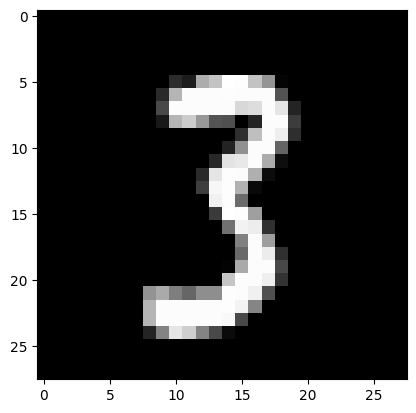

In [143]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


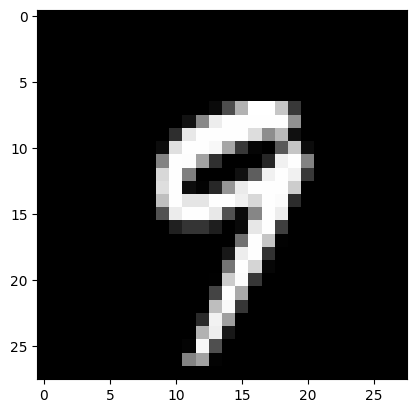

In [144]:
test_prediction(3, W1, b1, W2, b2)

In [145]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 0 5 5 3 0 4 6 4 4 2 4 5 8 3 8 0 3 3 3 2 0 4 1 1 5 1 4 5 9 1 9 0 4 4 9
 6 9 5 4 6 9 3 3 3 5 1 4 8 5 0 2 0 6 9 3 4 4 4 6 1 3 9 2 3 6 3 3 4 2 8 8 6
 1 3 4 8 1 8 3 6 1 2 5 6 3 2 8 6 4 8 6 4 0 6 8 4 1 1 6 4 1 6 4 2 8 3 1 9 0
 1 3 6 9 3 2 5 4 4 9 6 1 0 5 4 6 6 6 3 5 7 6 2 8 6 7 0 2 3 6 8 2 3 3 0 2 8
 3 6 2 8 0 9 1 7 3 7 4 5 0 1 3 3 4 6 5 5 0 7 6 9 2 2 2 3 0 6 1 2 7 3 3 6 4
 6 6 6 6 4 4 2 0 0 6 0 1 6 7 8 7 2 7 2 4 1 5 9 2 1 4 0 1 3 5 1 8 7 0 2 3 7
 7 6 0 9 4 6 0 2 2 6 9 4 2 3 1 9 2 0 9 7 9 2 4 0 4 9 8 1 9 6 7 1 6 2 1 0 7
 8 1 7 9 8 7 1 1 9 7 0 6 0 9 3 6 4 6 2 9 3 6 9 4 2 7 5 5 4 1 1 7 9 4 1 6 8
 9 2 6 3 4 9 7 2 7 0 9 7 4 7 6 9 3 3 8 6 7 4 4 9 1 2 7 0 0 4 7 9 6 0 1 5 7
 8 7 0 1 3 1 9 7 8 5 9 0 9 7 0 8 9 7 4 2 2 6 6 9 5 4 1 8 2 0 6 3 0 1 1 7 4
 0 0 2 1 9 1 6 3 1 9 2 3 7 3 5 6 5 1 1 8 6 5 1 1 6 8 2 6 2 0 2 5 5 7 7 6 9
 3 1 2 6 7 4 9 2 7 0 8 9 8 8 2 6 5 9 4 8 3 2 2 0 6 6 0 6 2 3 3 6 3 3 6 3 4
 4 7 3 6 1 6 8 8 0 7 3 9 1 6 6 4 6 0 9 4 2 9 2 3 5 8 7 0 3 4 6 9 7 4 0 4 2
 3 2 4 0 9 5 2 0 3 1 3 6 

0.855